### Gradient Descent Doubts ? 

#### Models from SKLearn

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

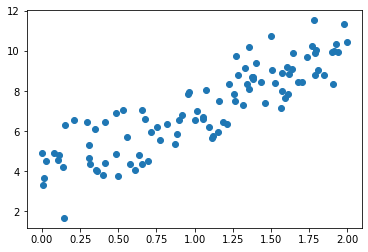

In [25]:
plt.scatter(X, y)
plt.show()

    np.c_[a, b] # col stack
    np.r_[a, b] # row stack

In [75]:

X_b = np.column_stack([np.ones((100, 1)), X])
m = X_b.shape[0]

In [76]:
theta = np.random.randn(2, 1)

In [77]:
def predict(X):
    return X.dot(theta)

In [78]:
y_hat = predict(X_b)

In [79]:
from sklearn.metrics import mean_squared_error as mse
mse(y, y_hat)

47.65958247511715

In [80]:
theta

array([[-0.40391694],
       [ 0.80166758]])

In [85]:
eta = 0.10
n_iterations = 1000
gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
theta = theta - eta*gradients

In [83]:
y_hat = predict(X_b)
mse(y, y_hat)

15.02110160227404

In [87]:
for it in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    y_hat = predict(X_b)
    if it % 100 == 0:
        print(mse(y, y_hat))

1.0447684707072364
1.0447684707072367
1.0447684707072367
1.0447684707072367
1.0447684707072367
1.0447684707072367
1.0447684707072367
1.0447684707072367
1.0447684707072367
1.0447684707072367


In [88]:
theta

array([[3.82442294],
       [3.14632745]])

In [ ]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [89]:
import seaborn as sns

In [97]:
mpg = sns.load_dataset('mpg').dropna()

In [98]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [99]:
features = ["cylinders", "displacement", "horsepower", "weight", "acceleration"]

    Transformers -> preprocess according to ML Model -> fit, transform, fit_transform
    Models -> used Train machine -> fit, predict

In [106]:
# Transformer Class
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None
    def fit(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        return self
    def transform(self, X):
        return (X-self.mean)/self.std
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    def __repr__(self):
        return "StandardScaler()"
        

In [107]:
scaler = StandardScaler()

In [108]:
X = mpg[features].to_numpy()
X_tr = scaler.fit_transform(X)

In [122]:
y = mpg['mpg'].to_numpy()

In [109]:
X[:5]

array([[   8. ,  307. ,  130. , 3504. ,   12. ],
       [   8. ,  350. ,  165. , 3693. ,   11.5],
       [   8. ,  318. ,  150. , 3436. ,   11. ],
       [   8. ,  304. ,  150. , 3433. ,   12. ],
       [   8. ,  302. ,  140. , 3449. ,   10.5]])

In [110]:
X_tr[:5]

array([[ 1.48394702,  1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48394702,  1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.48394702,  1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       [ 1.48394702,  1.04858429,  1.18439658,  0.53684535, -1.285258  ],
       [ 1.48394702,  1.02944745,  0.92426466,  0.5557062 , -1.82965485]])

$$ \hat y = b + wX$$

features = ["cylinders", "displacement", "horsepower", "weight", "acceleration"]

$$\hat {\text {mpg}} = \theta_0 + \theta_1 \text {cylinders} + \theta_2 \text {displacement} + \theta_3 \text {horsepower} + \theta_4 \text {weight} +\theta_5 \text {acceleration}  $$

$$ \hat y = \theta_0 + \theta_1 X_1 +  \theta_2 X_2 +  \theta_3 X_3 +  \theta_4 X_4 +  \theta_5 X5$$

      X_b => (m, 6)
    theta => (6, 1)
        y => (m, 1)

  $$\nabla_{\theta_j} = \frac {2}{m} \sum\limits_{i=1}^N (\hat y_i - y_i){X^j}_i$$

In [164]:
from sklearn.linear_model import SGDRegressor

#### Batch Gradient Descent

In [239]:
class MySGDRegressor:
    def __init__(self, eta0=0.01, max_iter=1000, tol=0.001, early_stopping=False):
        self.eta = eta0
        self.max_iter = max_iter
        self.matrix = []
    def fit(self, X, y):
        self.theta = np.random.randn(X.shape[1]+1, 1)
        # step-1: initlize weights and biases randomly
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # adding one extra feature for bias term having value 1
        y = y.reshape(-1, 1)
        # reshaping y just to make dimensions dot product familer
        self.matrix.append(self.theta)
        for _ in range(self.max_iter):
            # step2: calculate gradient of weights and biases
            gradients = (2/X_b.shape[0])*(X_b.T.dot((X_b.dot(self.theta)-y)))
            # step3: update weights and biases by subracting (decent) gradients
            # w_next = w - eta * gradient(w)
            self.theta = self.theta - (self.eta*gradients)
            self.matrix.append(self.theta)
            #if _ % 100 == 0:
            #    err = mse(y, X_b.dot(self.theta))
            #    print(err)
        self.coef_ = self.theta[1:,].flatten()
        self.intercept_ = self.theta[0]
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta).flatten()

In [240]:
model = MySGDRegressor()
model.fit(X_tr, y)

In [241]:
y_hat = model.predict(X_tr)

In [242]:
y[:5]

array([18., 15., 18., 16., 17.])

In [243]:
y_hat[:5]

array([18.57, 15.95, 18.01, 18.04, 18.48])

In [244]:
from sklearn.metrics import mean_squared_error as mse

In [245]:
error = mse(y, y_hat)
print(error)

17.775485699630885


In [254]:
my_model = MySGDRegressor()
model = SGDRegressor()

In [255]:
my_model.fit(X_tr, y)
model.fit(X_tr, y)

SGDRegressor()

In [256]:
my_model.intercept_

array([23.45])

In [257]:
model.intercept_

array([23.45])

In [258]:
my_model.coef_

array([-0.49, -0.85, -1.97, -3.62, -0.29])

In [259]:
model.coef_

array([-0.56, -0.57, -1.86, -3.92, -0.19])

In [261]:
y_1 = my_model.predict(X_tr)
y_2 = model.predict(X_tr)

In [262]:
print("My Model Error: ", mse(y, y_1))
print("Sklearn Model Error: ", mse(y, y_2))

My Model Error:  17.829614530800885
Sklearn Model Error:  17.78918019430832


In [264]:
from sklearn.metrics import r2_score

In [265]:
r2_score(y, y_1)

0.7065699310486608

In [266]:
r2_score(y, y_2)

0.707235377299589

In [267]:
from sklearn.linear_model import LinearRegression

In [268]:
m = LinearRegression()
m.fit(X_tr, y)
yt = m.predict(X_tr)
r2_score(y, yt)

0.7076926326770516

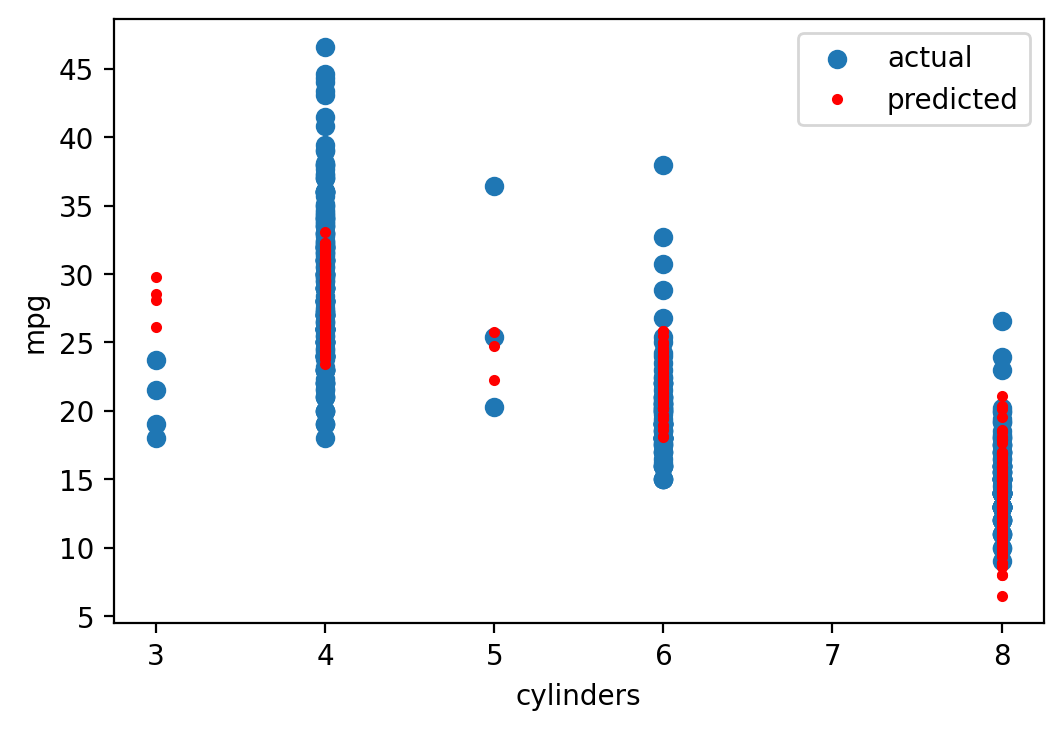

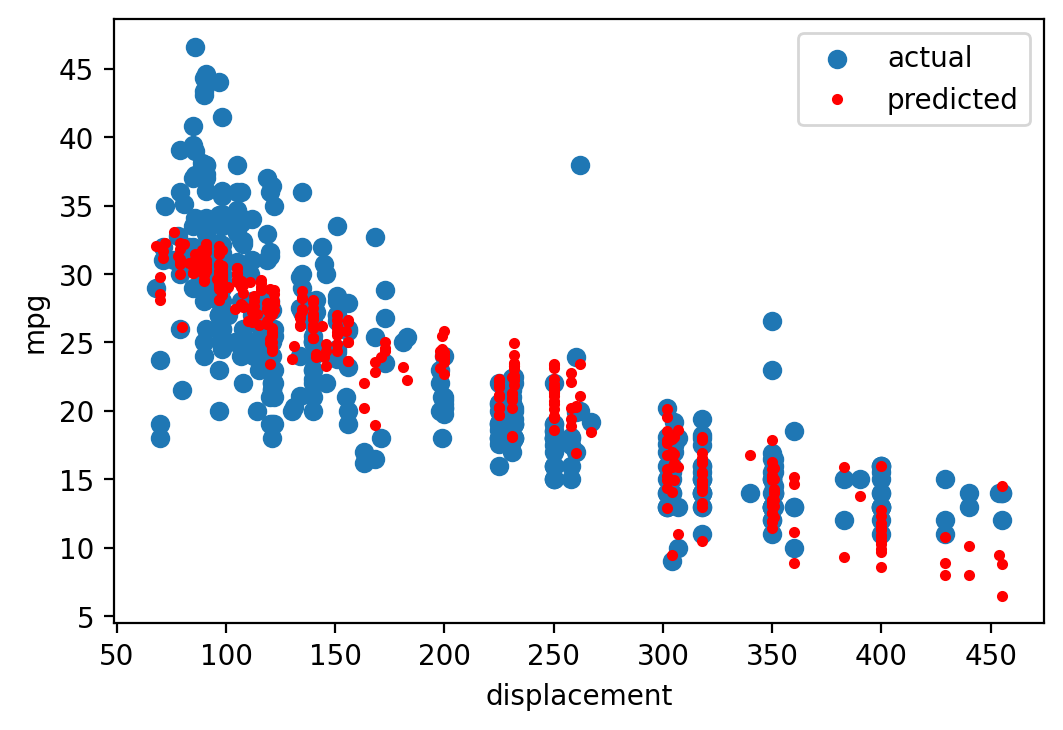

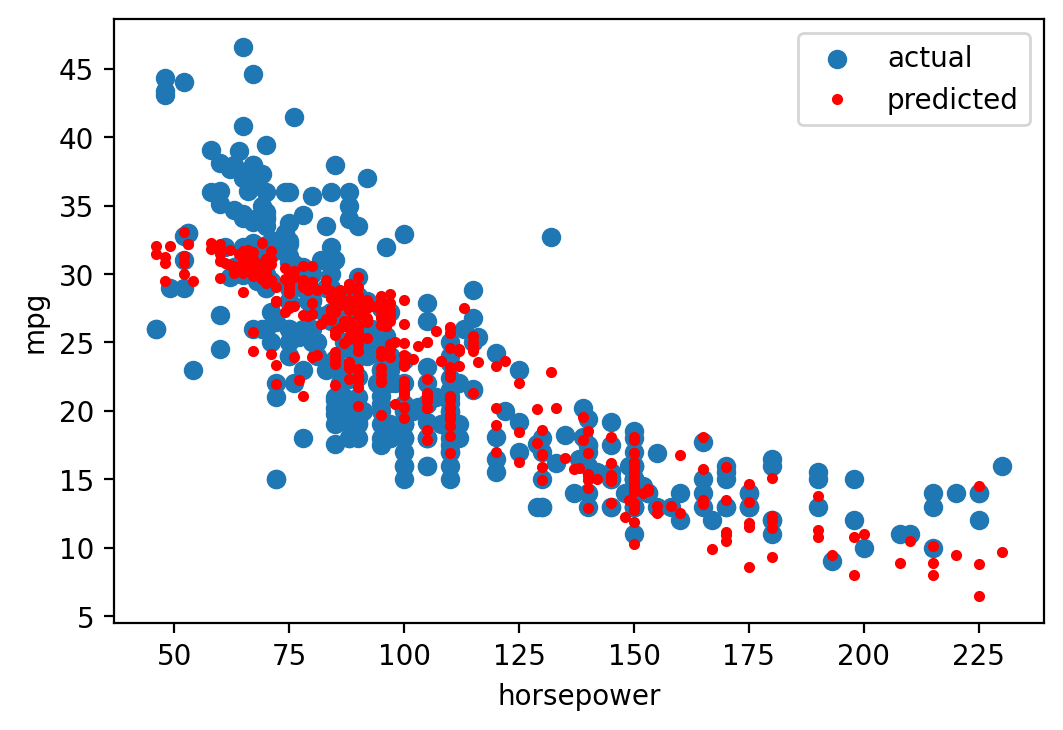

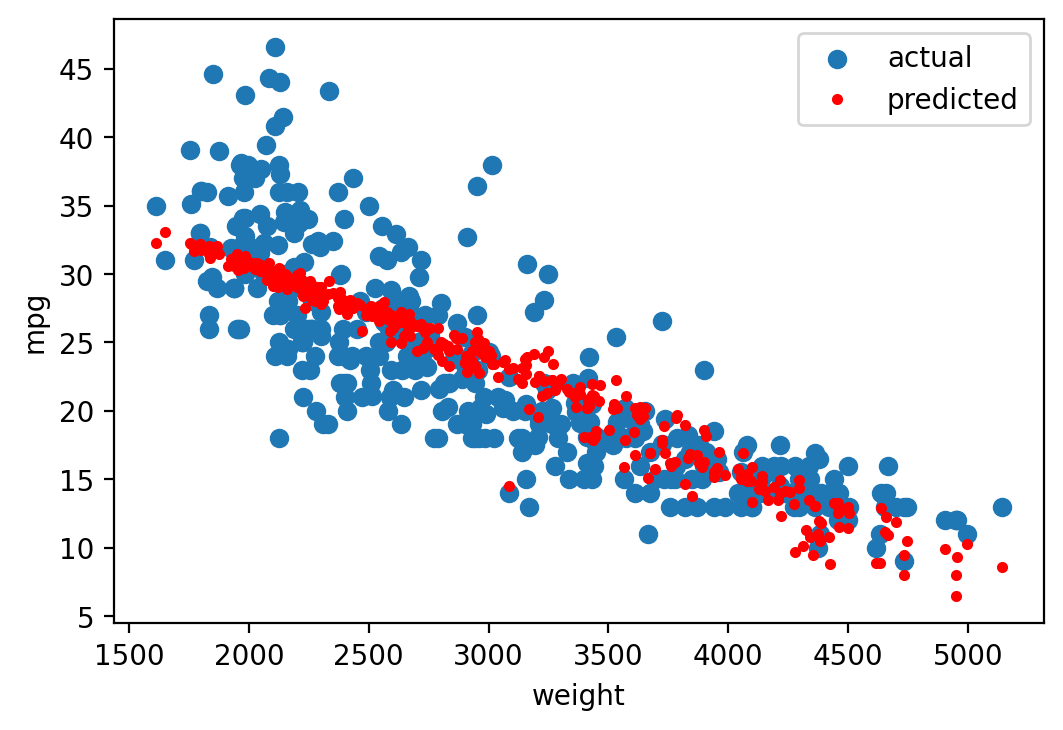

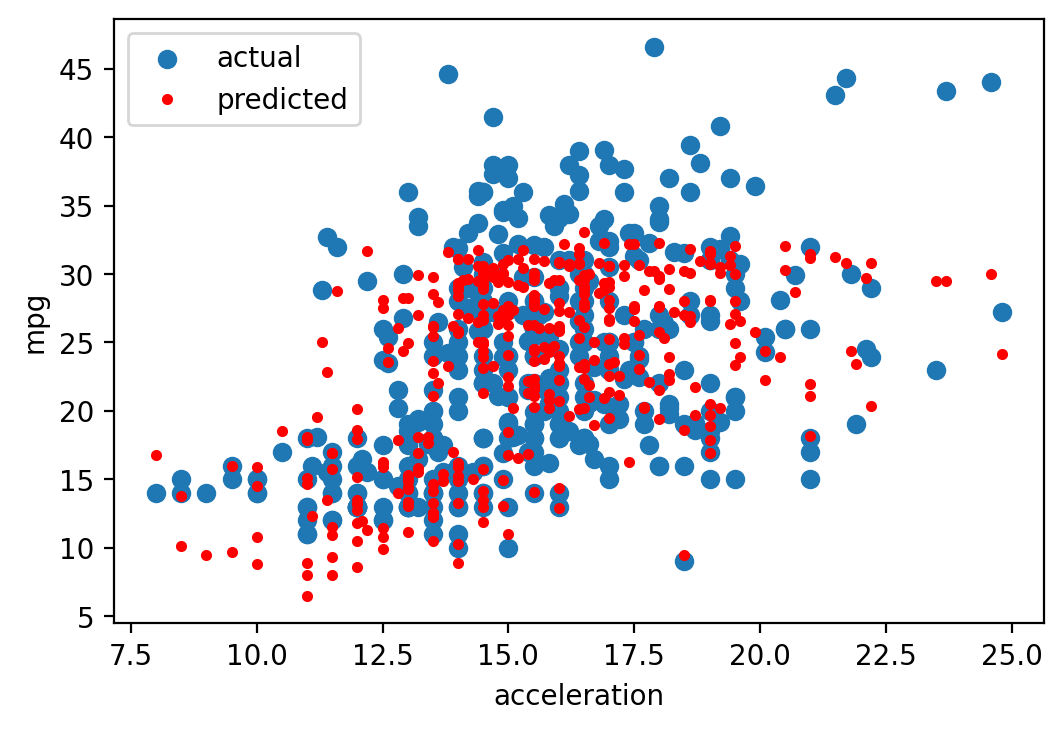

In [277]:
y_hat = my_model.predict(X_tr)
for col in features:
    plt.figure(dpi=200)
    plt.scatter(mpg[col], y,label='actual')
    plt.xlabel(col)
    plt.ylabel("mpg")
    plt.plot(mpg[col], y_hat, 'r.', label='predicted')
    plt.legend()
    plt.show()

In [283]:
np.random.choice(ri)

296

In [284]:
ri = np.arange(0, X.shape[0])
ix = np.random.choice(ri)

In [291]:
X_b[ix:ix+1].T.dot(yb[ix:ix+1])

array([[ 39.  ],
       [-33.7 ],
       [-40.46],
       [-41.06],
       [-50.69],
       [ 12.15]])

In [288]:
yb[ix]

array([39.])

In [286]:
X_b[ix]

array([ 1.  , -0.86, -1.04, -1.05, -1.3 ,  0.31])

### Stochastic Gradient Descent 

In [298]:
class MySGDRegressor:
    def __init__(self, eta0=0.01, max_iter=1000, tol=0.001, early_stopping=False):
        self.eta = eta0
        self.max_iter = max_iter
        self.matrix = []
    def fit(self, X, y):
        self.theta = np.random.randn(X.shape[1]+1, 1)
        # step-1: initlize weights and biases randomly
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # adding one extra feature for bias term having value 1
        y = y.reshape(-1, 1)
        # reshaping y just to make dimensions dot product familer
        self.matrix.append(self.theta)
        ri = np.arange(0, X_b.shape[0])
        np.random.shuffle(ri)
        for _ in range(self.max_iter):
            # step2: calculate gradient of weights and biases
            np.random.shuffle(ri)
            ix = np.random.choice(ri)
            gradients = (X_b[ix:ix+1].T.dot((X_b[ix:ix+1].dot(self.theta)-y[ix:ix+1])))
            # step3: update weights and biases by subracting (decent) gradients
            # w_next = w - eta * gradient(w)
            self.theta = self.theta - (self.eta*gradients)
            self.matrix.append(self.theta)
            #if _ % 100 == 0:
            #    err = mse(y, X_b.dot(self.theta))
            #    print(err)
        self.coef_ = self.theta[1:,].flatten()
        self.intercept_ = self.theta[0]
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta).flatten()

In [317]:
model = MySGDRegressor()

In [318]:
model.fit(X_tr, y)

In [319]:
model.coef_

array([-0.48, -1.18, -2.56, -2.56, -0.15])

In [320]:
model.intercept_

array([23.33])

In [321]:
from sklearn.linear_model import SGDRegressor
m = SGDRegressor()
m.fit(X_tr, y)
m.coef_

array([-0.64, -0.88, -1.83, -3.53, -0.27])

In [322]:
m.intercept_

array([23.45])

In [328]:
model = MySGDRegressor(max_iter=100000)

In [329]:
model.fit(X_tr, y)

In [330]:
y_hat = model.predict(X_tr)
print(r2_score(y, y_hat))

0.6838921654520331


In [326]:
model.coef_

array([-0.68,  0.11, -1.68, -5.04,  0.1 ])

In [327]:
model.intercept_

array([23.34])